In [2]:
#Biblioteki
import spacy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm")


#### Zadanie 1: Analiza wpływu struktury gramatycznej na toksyczność komentarzy
Przeprowadź analizę zależności składniowych (dependency parsing). Porównaj złożoność struktury gramatycznej w komentarzach o wysokiej i niskiej toksyczności. Przedstaw wyniki na wykresie pudełkowym, aby zobaczyć różnice w złożoności składniowej.

In [3]:
#Pobranie danych
df = pd.read_csv('sample.csv')
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,593336,0.166667,What a breathe of fresh air to have someone wh...,0.0,0.0,0.0,0.166667,0.0,NaN,NaN,...,151356,approved,0,0,0,4,0,0.0,0,6
1,756192,0.600000,Your jewish friends were the ones who told you...,0.2,0.0,0.6,0.400000,0.0,0.0,0.0,...,158493,approved,0,0,0,0,0,0.0,6,10
2,5407051,0.000000,Possible collusion by Trump and his affiliates...,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,343435,approved,0,0,0,1,0,0.0,0,4
3,5808132,0.000000,Exactly. We need a % of GDP spending cap at t...,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,368584,approved,0,0,0,7,0,0.0,0,4
4,557013,0.000000,"By your own comment, even if some of them vote...",0.0,0.0,0.0,0.000000,0.0,NaN,NaN,...,149754,approved,0,0,0,1,0,0.0,0,4


In [4]:
# Funkcja zliczająca istotne zależności składniowe w komentarzach
def count_deps(text):
    doc = nlp(text)
    return len([token for token in doc if token.dep_ != 'punct' and not token.is_stop])  

#level_toxic - klasyfikacja komentarza: 'high' (wysoka toksyczność) target >=0.5, 'low' (niska toksyczność) target <0.5.
df['level_toxic'] = np.where(df['target'] >= 0.5, 'high', 'low')
df['level_toxic'].value_counts()

level_toxic
low     9231
high     769
Name: count, dtype: int64

In [5]:
df["dep_counts"] = df['comment_text'].apply(count_deps)
df[['comment_text', 'dep_counts']].head()

,comment_text,dep_counts
0,What a breathe of fresh air to have someone wh...,16
1,Your jewish friends were the ones who told you...,29
2,Possible collusion by Trump and his affiliates...,23
3,Exactly. We need a % of GDP spending cap at t...,25
4,"By your own comment, even if some of them vote...",16


C:\Users\Basia\AppData\Local\Temp\ipykernel_14540\4000468267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='level_toxic', y='dep_counts', data=df, palette=palette, width=0.5)


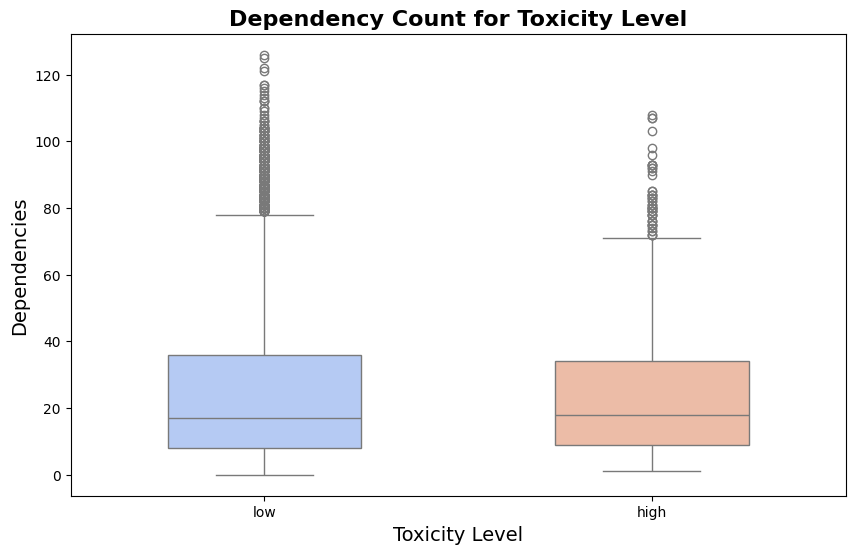

In [7]:
# Wykres pudełkowy rozkładu liczby zależności składniowych w komentarzach dla różnego poziomu toksyczności
palette = sns.color_palette("coolwarm", n_colors=2)  
plt.figure(figsize=(10, 6))
sns.boxplot(x='level_toxic', y='dep_counts', data=df, palette=palette, width=0.5)
plt.title('Dependency Count for Toxicity Level', fontsize=16, fontweight='bold')
plt.xlabel('Toxicity Level', fontsize=14)
plt.ylabel('Dependencies', fontsize=14)
plt.show()

#### Zadanie 2: Identyfikacja kluczowych czynników toksyczności na podstawie NER i zależności składniowych
Przeanalizuj najbardziej toksyczne komentarze pod kątem nazwanych jednostek (NER) oraz zależności składniowych (dependency parsing). Zidentyfikuj, jakie nazwane jednostki są najczęściej w toksycznych komentarzach i w jaki sposób struktura zależności przyczynia się do toksyczności. Przedstaw wyniki w postaci drzew zależności i statystyk.



In [9]:
# Funkcja do ekstrakcja nazwanych jednostek
def extract_entities(comment):
    doc = nlp(comment)
    return [ent.text for ent in doc.ents]

# Funkcja zliczenia zależności
def count_deps(text):
    doc = nlp(text)
    return len([token for token in doc if token.dep_ != 'punct' and not token.is_stop])  

df['entities'] = df['comment_text'].apply(extract_entities)

In [29]:
# Średnie dla komentarzy
dependency_mean = df['dep_counts'].mean()
entity_mean = df['entity_count'].mean()

print(f"Średnia liczba zależności w  komentarzach: {dependency_mean}")
print(f"Średnia liczba nazwanych jednostek w  komentarzach: {entity_mean}")

Średnia liczba zależności w  komentarzach: 25.842
Średnia liczba nazwanych jednostek w  komentarzach: 3.0906


C:\Users\Basia\AppData\Local\Temp\ipykernel_14540\1354618266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='level_toxic', y='entity_count', data=df, palette='coolwarm')


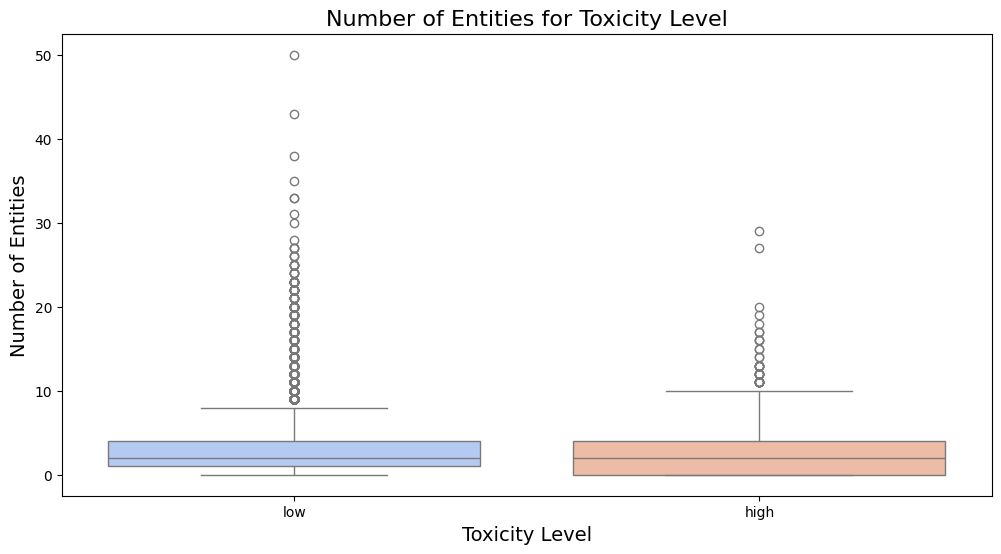

In [17]:
# Zliczenie jednostek w komentarzach
df['entity_count'] = df['entities'].apply(len)

# Wykres pudełkowy dla liczby jednostek w komentarzach o wysokiej i niskiej toksyczności
plt.figure(figsize=(12, 6))
sns.boxplot(x='level_toxic', y='entity_count', data=df, palette='coolwarm')
plt.title('Number of Entities for Toxicity Level', fontsize=16)
plt.xlabel('Toxicity Level', fontsize=14)
plt.ylabel('Number of Entities', fontsize=14)
plt.show()

In [65]:
# Filtrowanie komenatrzy o wysokiej toksyczności
toxic_comments= df[df['level_toxic'] == "high"][['comment_text', 'entities','dep_counts']]
toxic_comments

,comment_text,entities,dep_counts
1,Your jewish friends were the ones who told you...,"[jewish, Zionists, Canada, jewish, jews]",29
10,"""...more important than keeping this impetuous...","[Trump, Ryan]",21
44,"What rhymes with ""where there is a will there ...",[Cynical],22
78,None of these people speaking up for these ill...,[],5
117,She is absolutely corrupt. Wasting more taxpa...,[],8
...,...,...,...
9937,Canada's population is increasing steadily fro...,"[Canada, Ontario, Australia, US, Canada, Canad...",91
9943,I've read several accounts now of students bei...,"[first, https://itsgoingdown.org/beating-milo-...",45
9948,She's 100% correct. trump followers ARE deplo...,[100%],20
9952,lesser park --nah you are a little bit too dep...,[],6


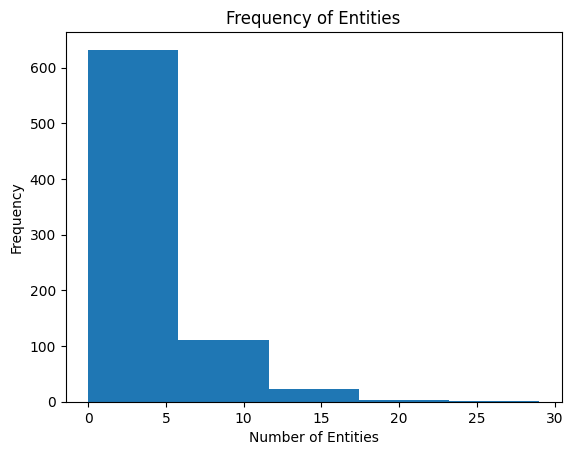

In [25]:
# Rozkład liczby nazwanych jednostek w toksycznych komentarzach
entity_counts = toxic_comments['entities'].apply(len) 
plt.hist(entity_counts, bins=5)
plt.title("Frequency of Entities")
plt.xlabel("Number of Entities")
plt.ylabel("Frequency")
plt.show()

C:\Users\Basia\AppData\Local\Temp\ipykernel_14540\2731326515.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='dep_counts', y='num_entities', data=toxic_comments, palette="coolwarm")


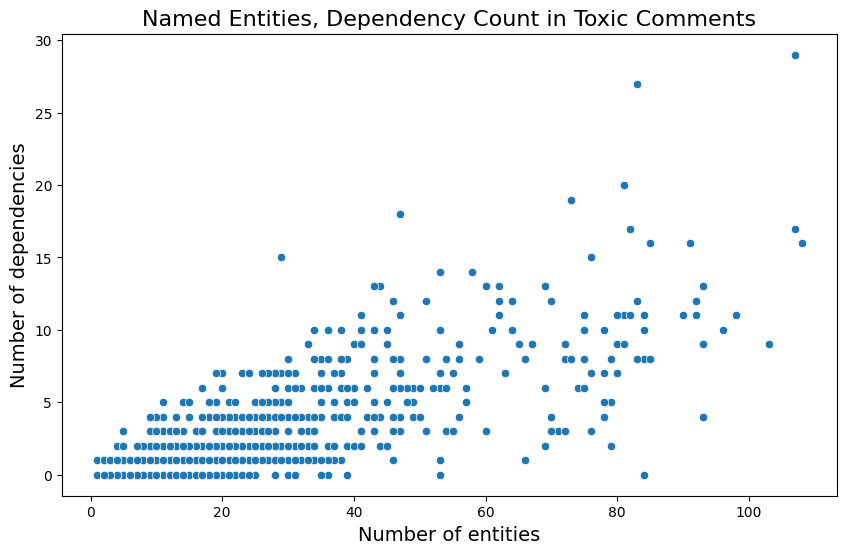

In [69]:
toxic_comments['num_entities'] = toxic_comments['entities'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='dep_counts', y='num_entities', data=toxic_comments, palette="coolwarm")
plt.title('Named Entities, Dependency Count in Toxic Comments', fontsize=16)
plt.xlabel('Number of entities', fontsize=14)
plt.ylabel('Number of dependencies', fontsize=14)
plt.show()

In [21]:

all_entities = [entity for sublist in toxic_comments['entities'] for entity in sublist]

# Zliczanie nazwanych jednostek w toksycznych komentarzach
count_entities = Counter(all_entities)
# 10 najczęściej występujących jednostek
popular_entities = count_entities.most_common(10)
popular_entities

[('Trump', 150),
 ('one', 32),
 ('Canada', 28),
 ('first', 27),
 ('Obama', 26),
 ('Canadians', 25),
 ('American', 19),
 ('Canadian', 17),
 ('Muslim', 16),
 ('Alaska', 16)]

In [22]:
sample_toxic_comments = toxic_comments['comment_text'].sample(3
                                        , random_state=42)
sample_toxic_comments

8680    I'm not impressed... those things are taking p...
4527    What is wrong with Alaskans? More taxes and sm...
8187    The issue is the when both sides work in oppos...
Name: comment_text, dtype: object

In [23]:
from spacy import displacy

options = {'distance': 100,'bg': '#f9f9f9', 'font': 'Arial'}
for comment in sample_toxic_comments[:3]:
    print(comment)
    doc = nlp(comment)
    displacy.render(doc, style="dep", jupyter=True, options=options)

I'm not impressed... those things are taking place because of political stupidity by both parties. They are still trying to implement MORE laws like we need or want them


What is wrong with Alaskans? More taxes and smaller paychecks are attractive to you people? Bernie Sanders? You people are nuts!


The issue is the when both sides work in opposition to each other you get this kind of " All management are useless leches", who's only goal is to steal from them. This is the North American way of business, the Germans understand you need the worker's and Management to work in tandem together for everyone's benefit!


#### Zadanie 3: Analiza stylu narracyjnego na podstawie zależności składniowych
Przeprowadź analizę zależności składniowych dla zdań z obu książek. Porównaj złożoność składniową obu tekstów (np. liczba podmiotów, dopełnień, orzeczeń w jednym zdaniu) i przedstaw wyniki na wykresach oraz wizualizacjach drzew składniowych.

In [48]:
# Wczytanie książek
with open('anna_karenina.txt', 'r', encoding='utf-8') as file:
    book1 = file.read()
with open('jane_eyre.txt', 'r', encoding='utf-8') as file:
    book2 = file.read()


In [49]:
# Model spaCy
nlp = spacy.load("en_core_web_sm")
#Ustawienie maksymalnie długości tekstu
nlp.max_length = 2000000

# Przekształcenie tekstu na obiekt spaCy  
book1_doc = nlp(book1)
book2_doc = nlp(book2)

# Podział tekstu na zdania
sentences_book1 = [sent.text for sent in book1_doc.sents]
sentences_book2 = [sent.text for sent in book2_doc.sents]

In [50]:
def analyze_sentence(sentence):
    doc = nlp(sentence)
    subjects = sum(1 for token in doc if token.dep_ == 'nsubj')
    verbs = sum(1 for token in doc if token.pos_ == 'VERB') 
    objects = sum(1 for token in doc if token.dep_ == 'dobj')
    return sentence, subjects, verbs, objects

In [51]:
# Przetwarzanie zdań 
syntax_book1 = [analyze_sentence(sentence) for sentence in sentences_book1]
syntax_book2 = [analyze_sentence(sentence) for sentence in sentences_book2]
df_book1 = pd.DataFrame(syntax_book1, columns=['sentence','subjects', 'verbs', 'objects'])
df_book2 = pd.DataFrame(syntax_book2, columns=['sentence','subjects', 'verbs', 'objects'])

In [52]:
df_book1

,sentence,subjects,verbs,objects
0,﻿The Project Gutenberg eBook of Anna Karenina\...,1,0,0
1,"You may copy it, give it away or re-use it und...",1,6,3
2,"If you are not located in the United States,\n...",1,5,2
3,Title: Anna Karenina\n\nAuthor: graf Leo Tolst...,0,0,0
4,"Constance Garnett\n\nRelease date: July 1, 1998",0,0,0
...,...,...,...,...
19954,"For forty years, he produced and\ndistributed ...",1,2,1
19955,Project Gutenberg™ eBooks are often created fr...,0,5,0
19956,"Thus, we do not\nnecessarily keep eBooks in co...",1,1,1
19957,Most people start at our website which has the...,2,2,1


In [53]:

df_book2

,sentence,subjects,verbs,objects
0,﻿The Project Gutenberg eBook of Jane Eyre: An ...,0,0,0
1,This ebook is for the use of anyone anywhere i...,1,0,0
2,"You may copy it, give it away or re-use it und...",1,6,3
3,"If you are not located in the United States,\n...",1,5,2
4,Title: Jane Eyre: An Autobiography\n\nAuthor: ...,3,4,1
...,...,...,...,...
8656,"For forty years, he produced and\ndistributed ...",1,2,1
8657,Project Gutenberg™ eBooks are often created fr...,0,5,0
8658,"Thus, we do not\nnecessarily keep eBooks in co...",1,1,1
8659,Most people start at our website which has the...,2,2,1


In [54]:
def calculate_averages(syntax_data):
    metrics = {
        "subjects": [],
        "verbs": [],
        "objects": [],
    }
    for sentence, subjects, verbs, objects in syntax_data:
        metrics["subjects"].append(subjects)
        metrics["verbs"].append(verbs)
        metrics["objects"].append(objects)
    
    return {key: sum(values) / len(values) for key, values in metrics.items()}

In [55]:
book1_averages = calculate_averages(syntax_book1)
book2_averages = calculate_averages(syntax_book2)

categories = ["Subjects", "Verbs", "Objects"]
book1_values = [book1_averages["subjects"], book1_averages["verbs"], book1_averages["objects"]]
book2_values = [book2_averages["subjects"], book2_averages["verbs"], book2_averages["objects"]]
book1_values
book2_values

[2.524419812954624, 3.184043413000808, 1.3225955432398107]

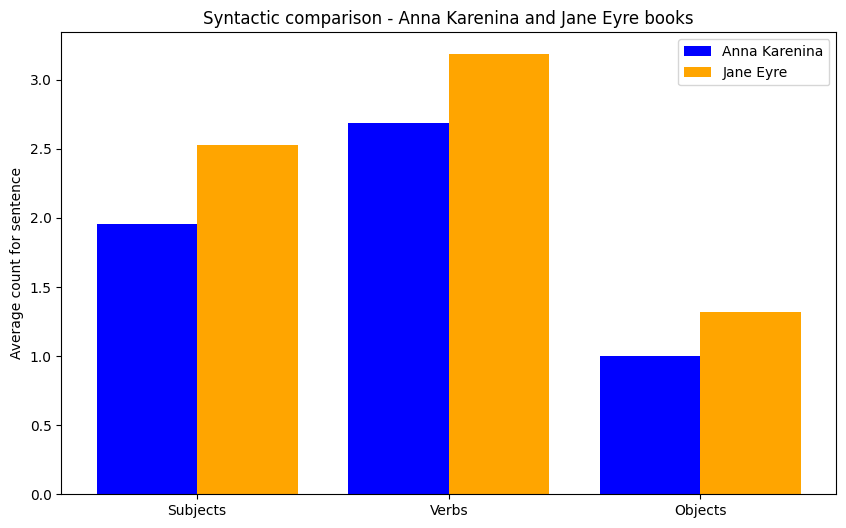

In [57]:
# Wykres porównujący złożoność składniową dla książek Anna Karenina i Jane Eyre
plt.figure(figsize=(10, 6))
x = range(len(categories))
plt.bar(x, book1_values, width=0.4, label="Anna Karenina", color='blue', align='center')
plt.bar([i + 0.4 for i in x], book2_values, width=0.4, label="Jane Eyre", color='orange', align='center')
plt.xticks([i + 0.2 for i in x], categories)
plt.ylabel("Average count for sentence")
plt.title("Syntactic comparison - Anna Karenina and Jane Eyre books")
plt.legend()
plt.show()

In [58]:
# Generowanie drzew zależności dla zdań 
sample_book1 = sentences_book1[1:4]  
sample_book2 = sentences_book2[1:4]  

for sentence in sample_book1:
    doc = nlp(sentence)
    print(sentence)
    displacy.render(doc, style="dep", jupyter=True)

for sentence in sample_book2:
    doc = nlp(sentence)
    print(sentence)
    displacy.render(doc, style="dep", jupyter=True)

You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.


If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.




Title: Anna Karenina

Author: graf Leo Tolstoy

Translator:


This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.


You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.


If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.




#### Zadanie 4: Analiza tematyczna na podstawie NER i lematyzacji – porównanie podejścia do postaci i miejsc w obu książkach
Wykorzystaj NER i lematyzację, aby porównać, w jaki sposób "Anna Karenina" i "Jane Eyre" traktują postaci i miejsca. Zidentyfikuj najczęściej wspominane jednostki i zanalizuj ich kontekst. Wyniki przedstaw w formie chmur słów i raportu porównawczego.

In [30]:
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

# Wczytanie książek
with open('anna_karenina.txt', 'r', encoding='utf-8') as file:
    book1 = file.read()
with open('jane_eyre.txt', 'r', encoding='utf-8') as file:
    book2 = file.read()
    

In [31]:
# Funkcja do ekstrakcji nazwanych jednostek (postaci i miejsc)
def extract_entities(text, entity_types):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in entity_types]

people_book1 = extract_entities(book1, ['PERSON'])
places_book1 = extract_entities(book1, ['GPE'])

people_book2 = extract_entities(book2, ['PERSON'])
places_book2 = extract_entities(book2, ['GPE'])

In [34]:
# Funkcja do lematyzacji
def lemmatize_entities(entities):
    return [nlp(entity)[0].lemma_ for entity in entities]

# Lematizacja osób i miejsc w obu książkach 
lemmatized_people_book1 = lemmatize_entities(people_book1)
lemmatized_people_book2 = lemmatize_entities(people_book2)
lemmatized_places_book1 = lemmatize_entities(places_book1)
lemmatized_places_book2 = lemmatize_entities(places_book2)

In [39]:
# Najczęściej wspominane osoby i miejsca w książce 'Anna Karenina'
people_count_book1 = Counter(lemmatized_people_book1).most_common(100)
places_count_book1 = Counter(lemmatized_places_book1).most_common(100)
print("Najczęściej występujące osoby w 'Anna Karenina':")
print(people_count_book1)
print("Najczęściej występujące miejsca w 'Anna Karenina':")
print(places_count_book1)

Najczęściej występujące osoby w 'Anna Karenina':
[('Levin', 1438), ('Anna', 789), ('kitty', 630), ('Alexey', 510), ('Vronsky', 458), ('Stepan', 176), ('Darya', 142), ('varenka', 136), ('Betsy', 111), ('Konstantin', 103), ('seryozha', 86), ('Golenishtchev', 66), ('yashvin', 65), ('Project', 51), ('veslovsky', 50), ('nikolay', 46), ('Countess', 41), ('Laska', 41), ('Lidia', 41), ('Vassenka', 37), ('petritsky', 35), ('Kostya', 24), ('Grisha', 23), ('Lizaveta', 23), ('Nikolay', 21), ('tit', 21), ('sviazhsky', 21), ('Prince', 20), ('Petersburg', 20), ('Princess', 20), ('Pyotr', 20), ('Landau', 20), ('ryabinin', 19), ('Lvov', 18), ('shtcherbatsky', 17), ('Sergey', 17), ('Ivan', 17), ('Agafea', 17), ('Masha', 16), ('Varvara', 16), ('Count', 14), ('Korney', 14), ('Mademoiselle', 13), ('Sappho', 13), ('Snetkov', 13), ('Alexander', 12), ('Liza', 12), ('stremov', 12), ('Mihail', 11), ('karenin', 11), ('vassily', 11), ('mahotin', 11), ('Varya', 11), ('yegor', 11), ('kapitonitch', 11), ('Stiva', 10

In [43]:
# Najczęściej wspominane osoby i miejsca w książce 'Jane Eyre'
people_count_book2 = Counter(lemmatized_people_book2).most_common(100)
places_count_book2 = Counter(lemmatized_places_book2).most_common(100)
print("Najczęściej występujące osoby w 'Jane Eyre':")
print(people_count_book2)
print("Najczęściej występujące miejsca w 'Jane Eyre':")
print(places_count_book2)

Najczęściej występujące osoby w 'Jane Eyre':
[('Rochester', 301), ('jane', 260), ('fairfax', 109), ('Bessie', 103), ('Miss', 97), ('Mary', 96), ('Reed', 87), ('Diana', 74), ('John', 71), ('Project', 51), ('Eyre', 46), ('Hannah', 40), ('Helen', 39), ('Brocklehurst', 38), ('St.', 38), ('Jane', 34), ('river', 32), ('lowood', 23), ('Scatcherd', 23), ('Mason', 23), ('Temple', 20), ('Edward', 20), ('janet', 19), ('Oliver', 18), ('Abbot', 16), ('Eshton', 16), ('brigg', 15), ('Morton', 15), ('Ingram', 14), ('Lloyd', 12), ('Carter', 12), ('Miller', 11), ('&', 11), ('poole', 11), ('dent', 11), ('sam', 11), ('Louisa', 10), ('Robert', 9), ('Lady', 9), ('whitcross', 9), ('Rosamond', 9), ('burn', 8), ('George', 7), ('varen', 7), ('Richard', 7), ('missis', 6), ('Adèle', 6), ('Gutenberg', 6), ('gateshead', 5), ('grace', 5), ('amy', 5), ('Amy', 5), ('Lynn', 5), ('hush', 5), ('satin', 4), ('Barbara', 4), ('bush', 4), ('Henry', 4), ('wood', 4), ('carlo', 4), ('David', 3), ('Sarah', 3), ('gaunt', 3), ('Ge

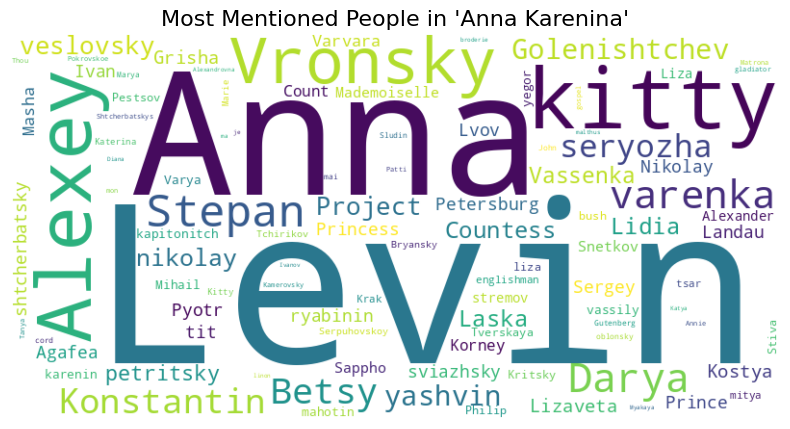

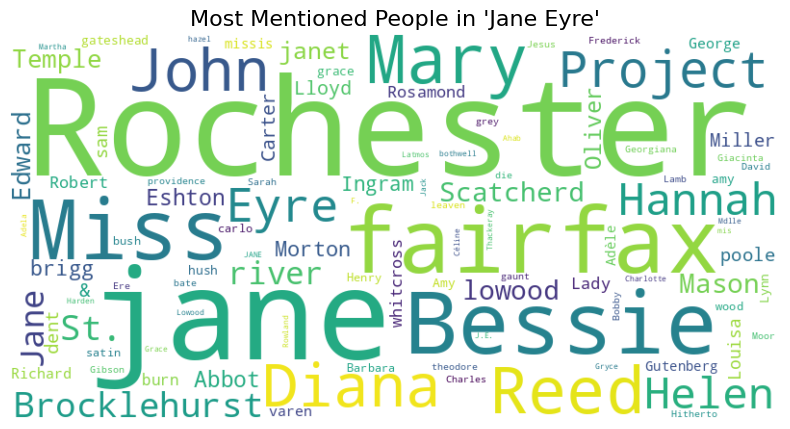

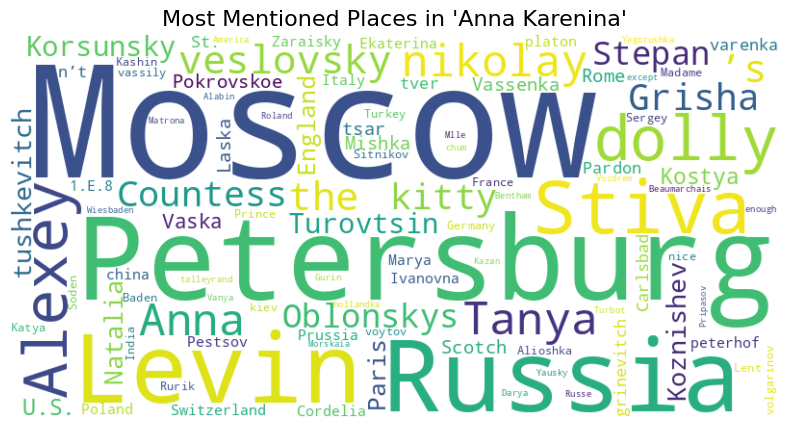

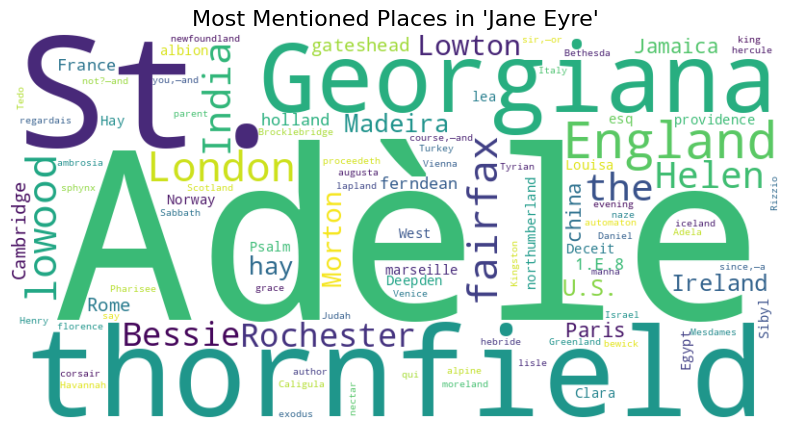

In [44]:
# Funkcja generowania chmury słów
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Chmury słów dla osób
generate_wordcloud(people_count_book1, "Most Mentioned People in 'Anna Karenina'")
generate_wordcloud(people_count_book2, "Most Mentioned People in 'Jane Eyre'")
# Chmury słów dla miejsc
generate_wordcloud(places_count_book1, "Most Mentioned Places in 'Anna Karenina'")
generate_wordcloud(places_count_book2, "Most Mentioned Places in 'Jane Eyre'")

In [47]:
# Analiza kontekstu

# Funkcja do wyciągania zdań zawierających nazwane jednostki
def extract_context(sentences, entity):
    return [sentence for sentence in sentences if entity in sentence]

# Dla najczęściej wspominianej osoby
key_person_book1 = people_count_book1[0][0]  
sentences_book1 = [sent.text for sent in nlp(book1).sents]
key_person_context_book1 = extract_context(sentences_book1, key_person_book1)
print(f"Zdania wspominające {key_person_book1} w 'Anna Karenina':")
for context in key_person_context_book1[:5]:
    print(context)

Zdania wspominające Levin w 'Anna Karenina':
“Why, it’s actually you, Levin, at last!”
he said with a friendly
mocking smile, scanning Levin as he approached.
“Have you been here
long?”

“I have just come, and very much wanted to see you,” said Levin,
looking shyly and at the same time angrily and uneasily around.


Levin was not a
disreputable chum, but Oblonsky, with his ready tact, felt that Levin
fancied he might not care to show his intimacy with him before his
subordinates, and so he made haste to take him off into his room.


Levin was almost of the same age as Oblonsky; their intimacy did not
rest merely on champagne.
